<a href="https://colab.research.google.com/github/rajitk13/csi-team-3-project/blob/main/one_month_chennai_Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/celebal internship/air quality index/chennai_aqi/one_month_chennai.csv')
df.head()

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,54,120.0,2023-07-03:18,7.0,63.0,26.0,14.00,31.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,78,115.3,2023-07-03:17,7.0,68.7,30.7,25.00,38.0,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,82,110.7,2023-07-03:16,7.0,74.3,35.3,27.00,45.0,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,100,106.0,2023-07-03:15,7.0,80.0,40.0,35.00,52.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,134,104.7,2023-07-03:14,6.0,77.0,38.3,28.75,42.7,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

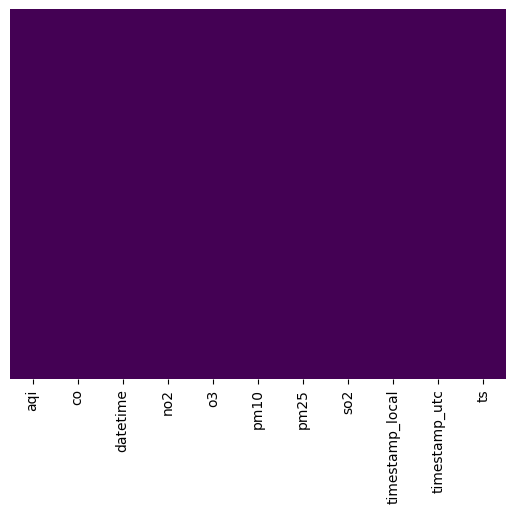

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              721 non-null    int64  
 1   co               721 non-null    float64
 2   datetime         721 non-null    object 
 3   no2              721 non-null    float64
 4   o3               721 non-null    float64
 5   pm10             721 non-null    float64
 6   pm25             721 non-null    float64
 7   so2              721 non-null    float64
 8   timestamp_local  721 non-null    object 
 9   timestamp_utc    721 non-null    object 
 10  ts               721 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 62.1+ KB


In [7]:

y=df.iloc[:,0] ## dependent features
y

0       54
1       78
2       82
3      100
4      134
      ... 
716     78
717     78
718     69
719     74
720     72
Name: aqi, Length: 721, dtype: int64

In [8]:
df.columns

Index(['aqi', 'co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts'],
      dtype='object')

In [9]:
X=df[['co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts']] ## independent features

In [10]:
X

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,120.0,2023-07-03:18,7.0,63.0,26.0,14.00,31.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,115.3,2023-07-03:17,7.0,68.7,30.7,25.00,38.0,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,110.7,2023-07-03:16,7.0,74.3,35.3,27.00,45.0,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,106.0,2023-07-03:15,7.0,80.0,40.0,35.00,52.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,104.7,2023-07-03:14,6.0,77.0,38.3,28.75,42.7,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800
...,...,...,...,...,...,...,...,...,...,...
716,76.3,2023-06-03:22,7.3,54.7,44.3,25.00,29.7,2023-06-04T03:30:00,2023-06-03T22:00:00,1685829600
717,76.0,2023-06-03:21,9.0,53.0,46.0,25.00,29.0,2023-06-04T02:30:00,2023-06-03T21:00:00,1685826000
718,80.3,2023-06-03:20,6.7,61.0,47.0,21.00,21.3,2023-06-04T01:30:00,2023-06-03T20:00:00,1685822400
719,84.7,2023-06-03:19,4.3,69.0,48.0,23.00,13.7,2023-06-04T00:30:00,2023-06-03T19:00:00,1685818800


In [11]:
X.isnull()

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
716,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False,False,False,False
719,False,False,False,False,False,False,False,False,False,False


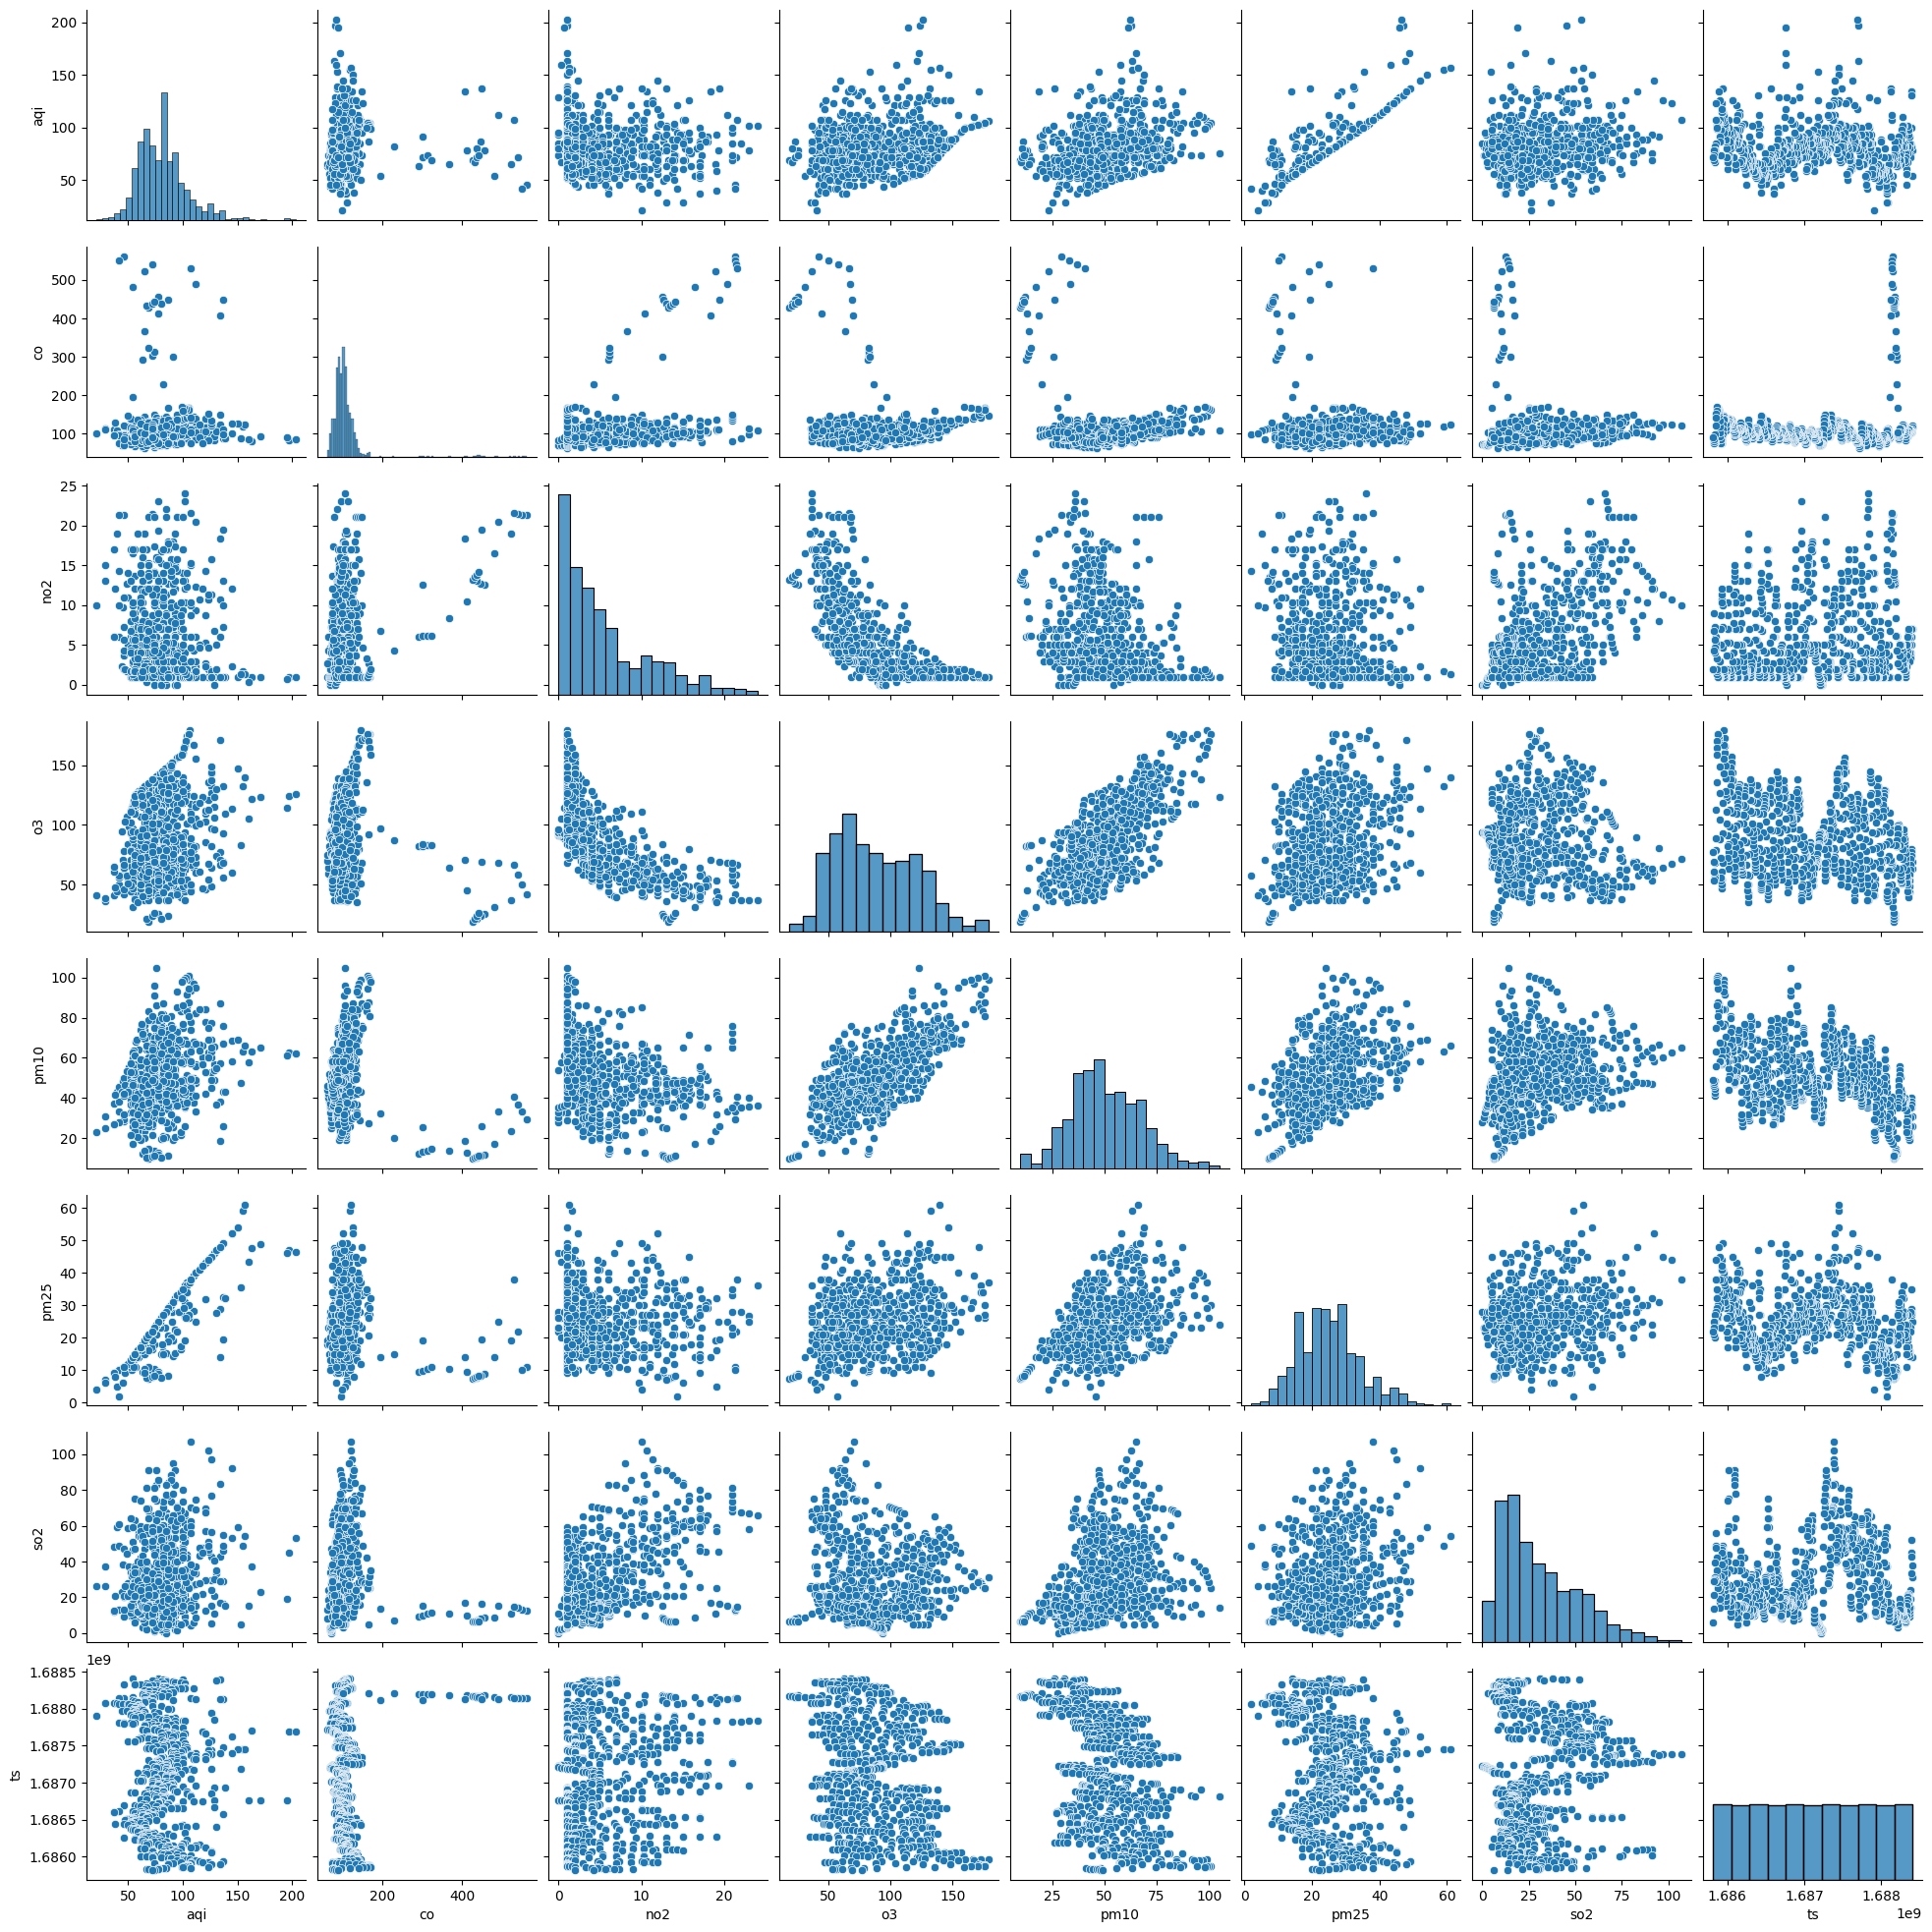

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,aqi,co,no2,o3,pm10,pm25,so2,ts
aqi,1.000000,0.030378,-0.070495,0.251013,0.324842,0.897454,0.208289,-0.081771
co,0.030378,1.000000,0.348368,-0.120501,-0.186097,-0.147544,-0.096880,0.167725
no2,-0.070495,0.348368,1.000000,-0.720812,-0.322269,-0.091110,0.498569,0.104420
o3,0.251013,-0.120501,-0.720812,1.000000,0.731281,0.276077,-0.097756,-0.272477
pm10,0.324842,-0.186097,-0.322269,0.731281,1.000000,0.433922,0.293878,-0.446614
pm25,0.897454,-0.147544,-0.091110,0.276077,0.433922,1.000000,0.280147,-0.189947
so2,0.208289,-0.096880,0.498569,-0.097756,0.293878,0.280147,1.000000,0.028282
ts,-0.081771,0.167725,0.104420,-0.272477,-0.446614,-0.189947,0.028282,1.000000


<ipython-input-14-eb5df078eb6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


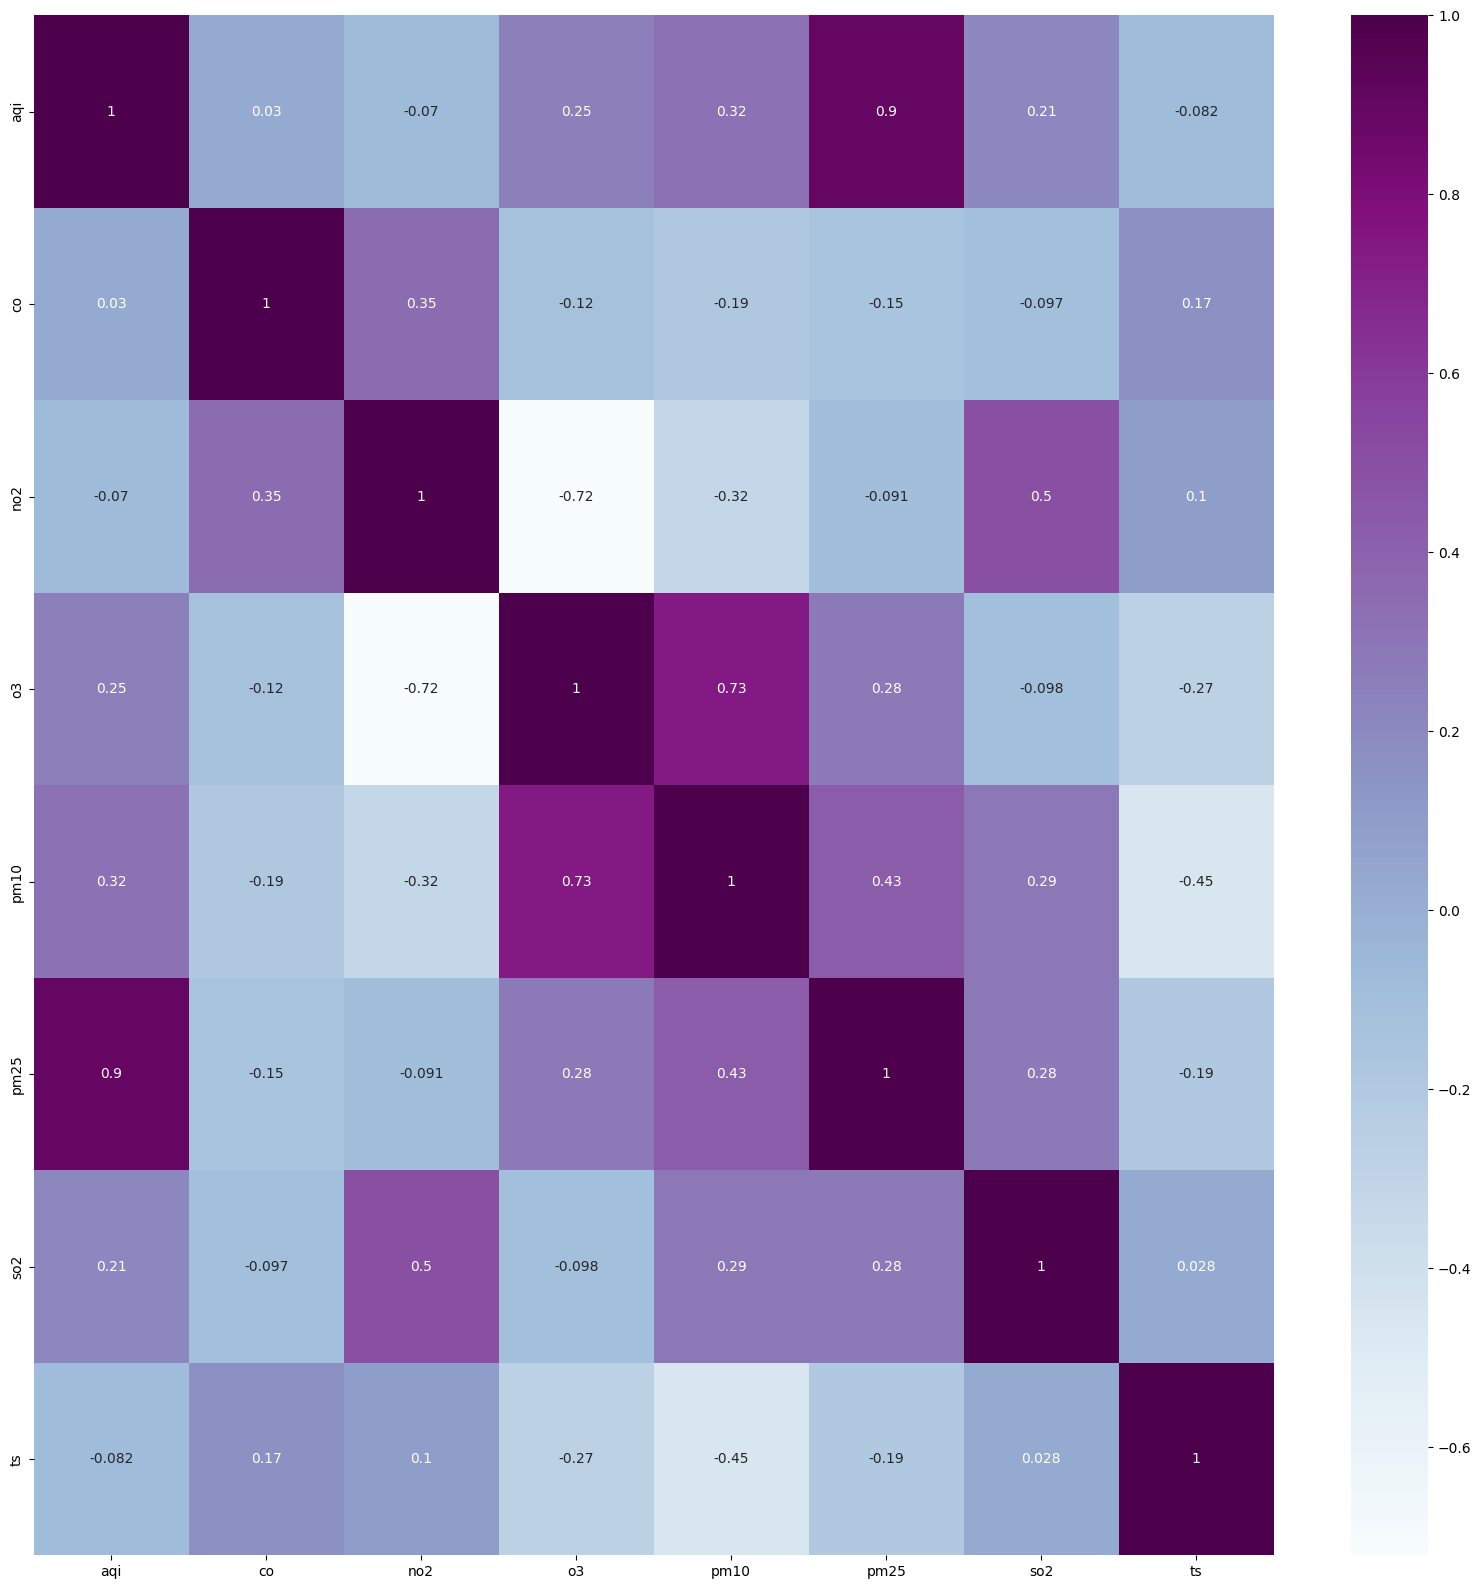

In [14]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BuPu")

In [15]:
corrmat.index

Index(['aqi', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'ts'], dtype='object')

In [16]:
X = X.drop(['datetime'],axis=1)
X = X.drop(['timestamp_local'],axis=1)
X = X.drop(['timestamp_utc'],axis=1)
X.head()

,co,no2,o3,pm10,pm25,so2,ts
0,120.0,7.0,63.0,26.0,14.00,31.0,1688407200
1,115.3,7.0,68.7,30.7,25.00,38.0,1688403600
2,110.7,7.0,74.3,35.3,27.00,45.0,1688400000
3,106.0,7.0,80.0,40.0,35.00,52.0,1688396400
4,104.7,6.0,77.0,38.3,28.75,42.7,1688392800


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

[0.03661202 0.01263874 0.02033725 0.0401517  0.84703312 0.0179581
 0.02526908]


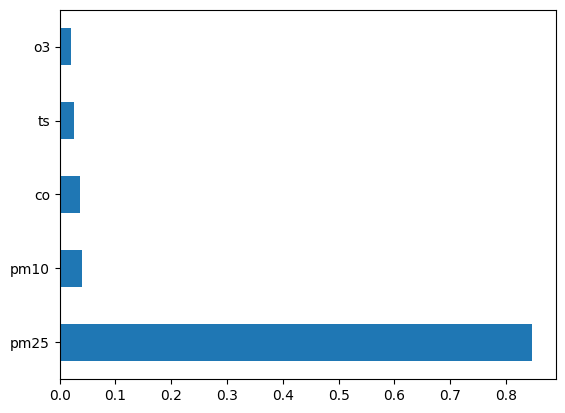

In [18]:
print(model.feature_importances_)


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<ipython-input-19-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='aqi', ylabel='Density'>

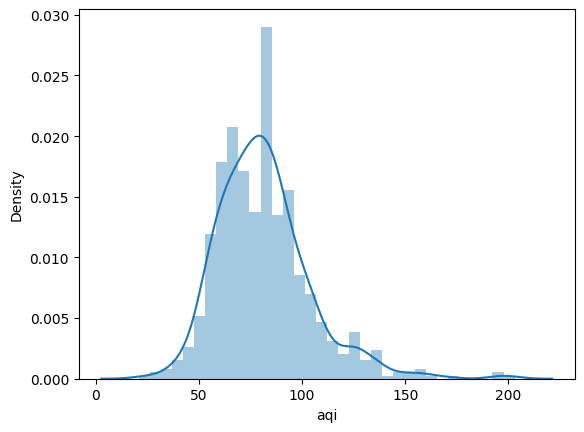

In [19]:
sns.distplot(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [21]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="friedman_mse")
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [22]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)
score.mean()

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.8271287058218616


0.6913190523221847

<ipython-input-23-9c718ae2e6c4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='aqi', ylabel='Density'>

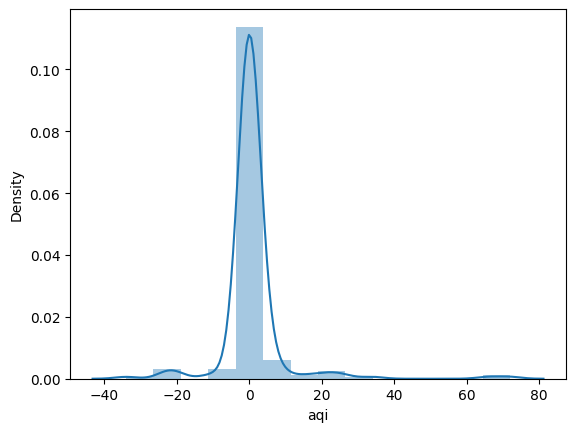

In [23]:
prediction=dtree.predict(X_test)
sns.distplot(y_test-prediction)

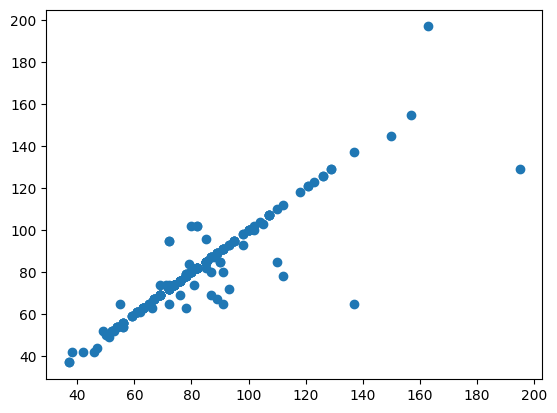

In [24]:
plt.scatter(y_test,prediction)

In [25]:
DecisionTreeRegressor()


params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]

}

from sklearn.model_selection import GridSearchCV

In [26]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [27]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X,y)
timer(start_time)

Fitting 5 folds for each of 10240 candidates, totalling 51200 fits

 Time taken: 0 hours 3 minutes and 51.2 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


<ipython-input-28-2736cc7ba129>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='aqi', ylabel='Density'>

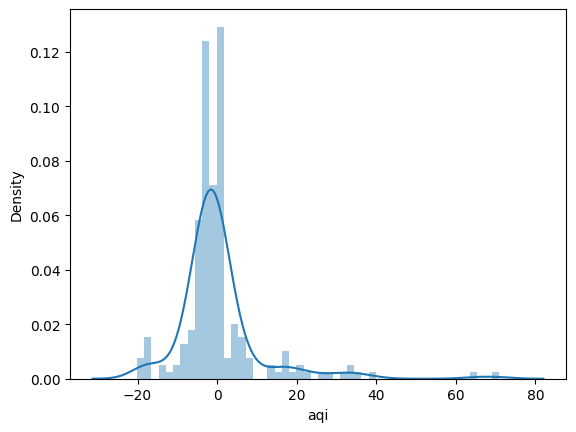

In [28]:
random_search.best_params_

random_search.best_score_

predictions=random_search.predict(X_test)
sns.distplot(y_test-predictions)

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.855399157777262
MSE: 118.89540072973101
RMSE: 10.903916760950214
